# Problem Set 2: Intro to Python and Jupyter Notebooks
Geosci 420/720: Methods in Paleomagnetism and Environmental Magnetism

**Due Wednesday, Feb. 16**

In this problem set, we'll run a few PmagPy commands so you can see how that works within the Notebook structure.  Then, as time permits, we'll look at some basic Python programming language.  Topics covered below are:
1. Importing modules and other setup
2. Equal area projections
3. Basic Python programming
4. On your own

## 1. Importing modules and other setup
Python has what are called “modules”, which essentially are groups of commands or functions.  Because these functions take up memory space, they are only available after you have specifically “imported” them.  

Common modules (besides *pmagpy*) we will be using are:

*	*numpy* – a module with lots of math and ‘array’ functions (see below on arrays). *numpy* has all the math/trig functions you’re familiar with from Excel, including (but not limited to) the following:
     sin, cos, tan, arcsin, arcos, arcsin, arctan, radians, degrees, sum, exp, sqrt, log, log10 
     (note that log is the natural log and log10 is the base 10 log)
*	*matplotlib* – 2D plotting

*	*pylab* – related to matplotlib in some way that I don’t fully understand

*	*pandas* - for working with data tables, reading in datafiles, and other data analysis tools

*	*scipy* - tools for math, science, engineering

At the beginning of each homework, we will often need to first import the required modules and execute a few other commands to make sure the system is set up properly.  

In [1]:
import numpy as np
import scipy.integrate
import pandas as pd
import matplotlib.pyplot as plt
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag
from IPython.display import Image
%matplotlib inline
%config InlineBackend.figure_formats = {'svg',}

PROJ: proj_create_from_database: Cannot find proj.db



## 2. Equal Area Projections
There are two programs in the PmagPy module that do equal area plots.  **eqarea.py** reads in columns of declination and inclination.  **eqarea_magic.py** reads in a particular file format designed for interaction with the MagIC database and database tools. 

### Example 1
Let’s start by generating a set of declinations and inclinations that we can then plot.  We’ll use the **fishrot.py** command to generate a random distribution of directions centered about dec = 0°, inc =  45°.  These are drawn from a so-called Fisher distribution, which is like a Gaussian (or normal) distribution, but on a sphere.  We’ll learn more about Fisher distributions later.

**Note that when you run the *pmagpy* programs within Notebook, you need to first type an !**


In [2]:
!fishrot -D 0 -I 45 > di.txt

ERROR 1: PROJ: proj_create_from_database: Cannot find proj.db
PROJ: proj_create_from_database: Cannot find proj.db


Now we'll plot these directions using **eqarea.py**.  One downside to using the standard *pmagpy* programs within Notebook, is that we can't display figures directly.  We must save the figure, and then read it back in for display.

In [3]:
!eqarea -h


    NAME
       eqarea.py

    DESCRIPTION
       makes equal area projections from declination/inclination data

    INPUT FORMAT
       takes dec/inc as first two columns in space delimited file

    SYNTAX
       eqarea.py [options]

    OPTIONS
        -f FILE, specify file on command line
        -sav save figure and quit
        -fmt [svg,jpg,png,pdf] set figure format [default is svg]
        -s  SIZE specify symbol size - default is 20
        -Lsym  SHAPE  COLOR specify shape and color for lower hemisphere
        -Usym  SHAPE  COLOR specify shape and color for upper hemisphere
          shapes:  's': square,'o': circle,'^,>,v,<': [up,right,down,left] triangle, 'd': diamond,
                   'p': pentagram, 'h': hexagon, '8': octagon, '+': plus, 'x': cross
          colors:  [b]lue,[g]reen,[r]ed,[c]yan,[m]agenta,[y]ellow,blac[k],[w]hite

    


ERROR 1: PROJ: proj_create_from_database: Cannot find proj.db
PROJ: proj_create_from_database: Cannot find proj.db


In [4]:
!eqarea -f di.txt -sav -fmt png

1  saved in  di_eq.png


ERROR 1: PROJ: proj_create_from_database: Cannot find proj.db
PROJ: proj_create_from_database: Cannot find proj.db


The following line will read in your figure and display it.  

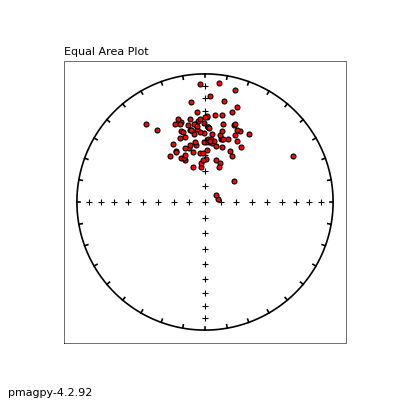

In [5]:
Image(filename='di_eq.png')

### Example 1: Alternative Approach
Alternatively (and perhaps confusingly) there is a parallel module called *ipmag* which uses some of the functionality of PmagPy but optimizes it for use in Notebooks.  These commands are similar, but not identical to the PmagPy commands and are not yet well documented.  The syntax is also different, and several additional steps are required. 

To get help with an *ipmag* command, type a *?* after the command:

In [6]:
ipmag.fishrot?

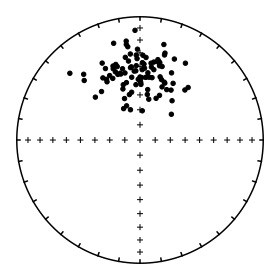

In [7]:
# Use the pound sign if you want to make a comment. This tells python not to try to execute what follows

DI = ipmag.fishrot(dec=0,inc=45)

fignum = 1                               # next three lines initialize the plot
plt.figure(num=1,figsize=(4,4),dpi=160)  #figure size can be changed here
ipmag.plot_net(1)

ipmag.plot_di(di_block=DI)                # generate the actual plot

### Example 2
Now we’ll make use of a dataset downloaded from the MagIC database (https://www2.earthref.org/MagIC).  This file contains site-mean declination and inclination data calculated from volcanics from the Snake River Plain in Idaho (Tauxe et al., 2004, *Geochem. Geophys. Geosys.*, doi:10.1029/2003GC000661).  These units span the age range 5 ka to 5.6 Ma. Each “site” is a single cooling unit, or lava flow, so multiple samples have been measured for each lava flow, then averaged together. 

In [8]:
!eqarea_magic -f Tauxe04_sites.txt -fmt png -sav

-E- Could not find C:\Users\Lenny Biller\Downloads\Tauxe04_sites.txt


ERROR 1: PROJ: proj_create_from_database: Cannot find proj.db
PROJ: proj_create_from_database: Cannot find proj.db


In [9]:
# Now import the figure
Image(filename='all_Snake_River_g_eqarea.png')

FileNotFoundError: [Errno 2] No such file or directory: 'all_Snake_River_g_eqarea.png'

Note the difference in symbol between lower and upper hemisphere projections.  What does this mean?


Now, let’s convert these paleomagnetic directions to VGPs.  What information do we need to calculate VGP?  

The study authors have already done this calculation, so we'll just plot their results for now.  

*(Note for next time: re-try with vgpmap_magic.py)* 

In [ ]:
# read in VGPs calculated by the study authors and plot
latlon = pd.read_csv('Tauxe04_VGP_latlon.txt',sep='\t',header=0)
lat = latlon['vgp_lat']
lon = latlon['vgp_lon']
map_axis = ipmag.make_orthographic_map(central_longitude=200,central_latitude=90)
ipmag.plot_vgp(map_axis,vgp_lat=lat,vgp_lon=lon,color='red',markersize=40)

## 3. Basic Python Programming
In this section, we will start to look at the Python code that the PmagPy modules or programs are written in.  This will be a bit of a crash course, but hopefully enough to give you some idea of how these programs are written.  You may not ever want to do any extensive programming yourself, but it’s often helpful to be able to read code that somebody else has written.

See the “Introduction to Python Programming” in the PmagPy Cookbook for additional helpful information: https://earthref.org/PmagPy/cookbook/#x1-1890007

### Get a feel for variables and basic math functions.

Like any programming language, you can assign values to variables and then carry out operations on those variables.  See what happens when you type the following (execute one line at a time):

  a=2  
  a  
  b=2  
  c=a+b  
  c  


In [ ]:
a = 2
a
b = 2
c = a + b
c

What is the difference between:

 x=1

and 

 y=1.

and 

 z=’one’

What happens when you enter:

 z+z


In [ ]:
x=1
x
y=1.
y
z='one'
z+z

What happens when you type:

  x = 180.
  
  cos(x)


In [ ]:
x=180.
cos(x)

The cos function is not native to Python.  This more compilcated math function requires using *numpy*, which we imported as *np*:


In [ ]:
np.cos(x)

Note that it did not return -1 (the cosine of 180°).  That’s because Python expects the input to be in radians. To convert degrees to radians, we multiply by &pi;/180.  Fortunately, we don’t have to remember &pi; out to the nth degree, because *numpy* knows it for us:

In [ ]:
y=x*np.pi/180.
np.cos(y)

Or, we can use the radians function:

In [ ]:
y=np.radians(x)
np.cos(y)

Also note that we have to put the module name followed by a dot (np.) before the function we want to call.  This is because other modules may have functions with the same names that do something different, and we want to avoid confusion.  There are shortcuts around this, but we’re not going to discuss them.


### Arrays
Arrays are sort of like lists or grids of data the way we will be using them. If you have taken linear algebra, arrays are a great way of doing matrix math.

Let’s say we want to calculate the magnetostatic interaction energy between one Bohr magneton and an Earth field of 40 uT for all angles between 0 and 180°.  

First, we’ll make an array with all the angles.  The following will make an array of values from 0 to 180 in steps of 1.0:


In [ ]:
theta_deg=np.arange(0,180,1.)   # generate the array
theta_deg                       # display the array

This is a one-dimensional array (only a single column or row of numbers), but you can have a 2-dimensional array (for example, 20 rows by 5 columns), or even a multi-dimensional array

### Python Scripts

It’s all fine and well to type stuff line by line, but if we want a program that we can run over and over again, we need to save the lines to a file, often called a “script”.  Notebook is a great way of working on a script until you get it perfected.  In our case, we won't save a separate file, but you will assemble a list of commands in a single code block and execute them all at once. 

We’re going to make a script to calculate and plot magnetostatic energy [aligning energy of a magnetic moment (m) in a field (B)]:

E<sub>m</sub> = -m B cos(&theta;)

The lines of code below re-import some of the modules.  If this were a stand-alone script, we would have to include them.  We'll discuss each of the lines.


In [ ]:
import numpy as np  # import the modules we will need
import matplotlib.pyplot as plt
import pylab    

mb=9.27e-24         # magnetic moment of one Bohr magneton (Am2)
field=40e-6         # field in T
theta_deg=np.arange(0,180,1.)    # angles in degrees
theta_rad=np.radians(theta_deg)  # angles in radians
Em = -mb*field*np.cos(theta_rad) # calculates the magnetostatic energy

print(Em)            # prints the output to your screen


In [ ]:
# Now let's make a plot

plt.plot(theta_deg,Em,'r--')     # plot using a red dashed line
plt.xlabel('Angle (degrees)')    # add label to x axis
plt.ylabel('Energy (Joules)')    # add label to y axis
plt.show()                       # actually make(show) the plot (not required in notbook, but would be in stand-alone script)


### IF, FOR, and WHILE blocks (if time)

We often want to either control the flow through the program based on the input, or we want to be able to repeat certain blocks of code without copying them 5, 10, or 1000 times. IF, FOR, and WHILE are common programming constructs that allow us to do this.  Note that within each block, the commands to be executed **MUST BE INDENTED**.

**IF**:  Here is an example of an IF block.  It is a logical way of stepping through a series of options.  *elif* is short for “else if”.  In other words, if the if condition isn’t satisfied, see if this next condition is satisfied.  If it is, do this.  If not, go to the next condition, if it exists.

You can change the value for "time" and re-execute the code.  See how the result changes.

In [ ]:
time = 3.

if time>20:
    print("Discuss IF,FOR, and WHILE")
elif time<20 and time>=10:
    print("Discuss IF and FOR")
elif time<10 and time>=5:
    print("Discuss IF")
else:
    print("Go home")
    

**FOR**:  The FOR loop basically lets you loop through a block of code multiple times, usually while one or more variables changes with each loop.  The example below generates a variable, y, with 3 numbers in it.  Then, it creates a variable i with the value of zero, and it will execute the last line 3 times.  Each time, it will increase i by 1.


In [ ]:
y= [5, 27, 16]
for i in range(0,3,1):
   print (y[i])


**WHILE**:  The WHILE loop is a little like the FOR loop, but it will repeat the loop until a condition is met.  For example:


In [ ]:
a=1
while a<10:
    print (a)
    a=a+1


This will repeat the last two lines until a is greater then or equal to 10.

## 4. On your own
For each problem below, use the Notebook to answer the questions.  

### Problem 1: North Shore Volcanics
The MagIC-formatted file TK09_sites.txt contains data from the North Shore Volcanics of Keweenawan age (~1.1 Ga) from the north shore of Lake Superior (Tauxe and Kodama, 2009, *Phys. Earth Planet. Lett.*, 177, 31-45).

A) (2 pt) Use *eqarea_magic.py* to plot the site-mean results.  Note that you will have to use the -crd flag to indicate tectonic (t) coordinates.  This means that the resulting paleomagnetic directions are rotated to take into account the fact that the lava flows have been tilted since being emplaced.


In [ ]:
!eqarea_magic -f TK09_sites.txt -fmt png -sav

B) Execute the code block below to plot the results as VGPs

In [10]:
latlon2 = pd.read_csv('TK09_VGP_latlon.txt',sep='\t',header=0)
lat2 = latlon2['vgp_lat']
lon2 = latlon2['vgp_lon']
map_axis2 = ipmag.make_orthographic_map(central_longitude=180,central_latitude=45)
ipmag.plot_vgp(map_axis2,vgp_lat=lat2,vgp_lon=lon2,color='red',markersize=40)

FileNotFoundError: [Errno 2] No such file or directory: 'TK09_VGP_latlon.txt'

C) (2 pt) Explain why the VGPs are not clustered about geographic North.
the continents have shifted, I am guessing that these projections are taken from a time that was greater than 5 MYA.


Markdown and LaTeX:  𝛼2

### Problem 2. The Langevin Function
(5 pt) Use the simplified version of the Langevin function (shown below and appropriate for small fields) and write a Python "script" (block of code) that calculates and plots M/M<sub>S</sub> (degree of alignment or degree of saturation) for a paramagnetic material in a 40 uT field at temperatures ranging from absolute zero (0K) to room temperature (300K). 

$$ 
{M \over M_S} \approx { {m_b B} \over {3kT}}
$$

You want to plot the term to the right of the &asymp; vs. temperature.

[                  inf 8.937198067632849e-06 4.468599033816425e-06
 2.979066022544283e-06 2.234299516908212e-06 1.787439613526570e-06
 1.489533011272142e-06 1.276742581090407e-06 1.117149758454106e-06
 9.930220075147611e-07 8.937198067632851e-07 8.124725516029864e-07
 7.447665056360708e-07 6.874767744332961e-07 6.383712905452036e-07
 5.958132045088566e-07 5.585748792270531e-07 5.257175333901677e-07
 4.965110037573806e-07 4.703788456648869e-07 4.468599033816425e-07
 4.255808603634690e-07 4.062362758014932e-07 3.885738290275152e-07
 3.723832528180354e-07 3.574879227053140e-07 3.437383872166481e-07
 3.310073358382537e-07 3.191856452726018e-07 3.081792437114776e-07
 2.979066022544283e-07 2.882967118591242e-07 2.792874396135265e-07
 2.708241838676621e-07 2.628587666950838e-07 2.553485162180814e-07
 2.482555018786903e-07 2.415458937198068e-07 2.351894228324434e-07
 2.291589248110987e-07 2.234299516908213e-07 2.179804406739719e-07
 2.127904301817345e-07 2.078418155263453e-07 2.031181379007466

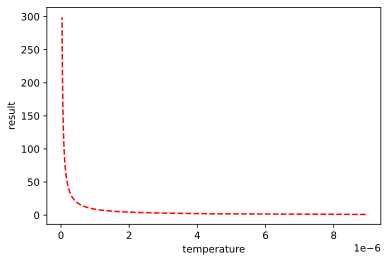

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pylab


k=1.38*10**-23
T=np.arange(0,300)
B=40*10**-6
m=9.25*10**-24

Lf=m*B/(3*k*T)

print(Lf)

plt.plot(Lf,T,'r--')
plt.ylabel('result')
plt.xlabel('temperature')
plt.show()


### Problem 3. Calculate thermal energy 
(3 pt) Calculate thermal energy at room temperature (300K).  How does this compare with the magnetostatic interaction energy, E<sub>m</sub> (magnetic alignment energy), we calculated in class (above)?  Do you expect a high degree of alignment in paramagnetic materials in Earth’s field at room temperature?  Why or why not?  (You can do the calculations on paper if you want, but you must show your work.)


In [12]:
k = 1.38*10**-23
T = 300
k*T


4.1399999999999995e-21

In [13]:
print("i do expect a high degree of allignment at earths field @ room temperature because we have not reached the curie temp for most materials ")

i do expect a high degree of allignment at earths field @ room temperature because we have not reached the curie temp for most materials 


### Grad Student Challenge Problem: D'I' Coordinate Transformations

The D'I' transformation rotates a set of directions so that the mean direction lies at the center of an equal area stereonet. (See Section 2.4.1 of your text: https://earthref.org/MagIC/books/Tauxe/Essentials/#x1-190002.4.1) This transformation can make it easier to visually compare the scatter and distrubtion of data sets with very different mean directions.

The answers to the following questions can be found in a variety of ways. Below, I assume you will use a combination of PmagPy on the command line (terminal) and Excel.  However, you can accomplish the same thing entirely within Notebook using PmagPy commands and/or the *ipmag* module and basic Python math commands.  See me if you would like assistance with this.

a) (2 pt) What is the expected GAD declination and inclination at 30°N?

b) (1 pt) Use the program *fishrot.py* to generate a Fisher-distributed set of directions, centered at the dec/inc you determined in (a).  

c) (1 pt) Plot these directions using *eqarea.py*. 

d) (3 pt) Now transform these D I coordinates into D’ I’ using the equations from your text.  You can use any program you like to do this (Excel, Python, Matlab, etc.).  See me if you’re having problems going from text file to Excel (or whatever) and back.

e) (1 pt) Now make an equal area plot of the D’I’ coordinates.